In [1]:
import numpy as np
import matplotlib.pyplot as plt

from gen_anchors import AnnotParser, AnchorKmeans

In [2]:
annot_dir = '../../data/VOCdevkit/VOC2007/Annotations/'
parser = AnnotParser(file_type='xml')
boxes = parser.parse(annot_dir=annot_dir)
print("Box num is:", len(boxes))

Box num is: 15662


In [3]:
results = {}
for k in range(2, 16):
    model = AnchorKmeans(k=k, random_seed=26)
    model.fit(boxes)
    avg_iou = model.avg_iou()
    results[k] = {
        'anchors': model.anchors_,
        'avg_iou': avg_iou
    }
    print("K = {}, Avg IOU = {:.4f}".format(k, avg_iou))

K = 2, Avg IOU = 0.4536
K = 3, Avg IOU = 0.5271
K = 4, Avg IOU = 0.5635
K = 5, Avg IOU = 0.5868
K = 6, Avg IOU = 0.6090
K = 7, Avg IOU = 0.6282
K = 8, Avg IOU = 0.6464
K = 9, Avg IOU = 0.6595
K = 10, Avg IOU = 0.6714
K = 11, Avg IOU = 0.6808
K = 12, Avg IOU = 0.6904
K = 13, Avg IOU = 0.7011
K = 14, Avg IOU = 0.7087
K = 15, Avg IOU = 0.7163


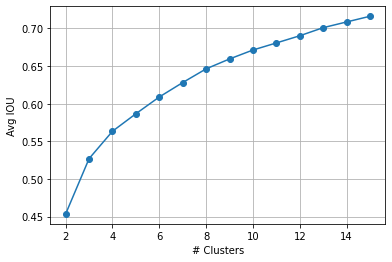

In [4]:
plt.figure()
plt.plot(range(2, 16), [results[k]['avg_iou'] for k in range(2, 16)], 'o-')
plt.grid()
plt.ylabel('Avg IOU')
plt.xlabel('# Clusters')
plt.show()

In [5]:
anchors = results[9]['anchors']
print(np.around(anchors * 416).astype(np.int32))

[[ 77  71]
 [293 185]
 [148 129]
 [ 38 115]
 [364 344]
 [ 76 195]
 [ 25  40]
 [132 274]
 [220 328]]


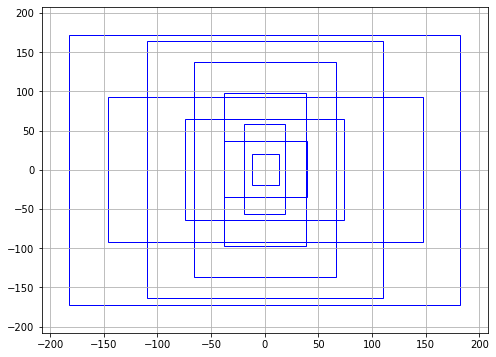

In [6]:
w_img, h_img = 416, 416

anchors[:, 0] *= w_img
anchors[:, 1] *= h_img
anchors = np.round(anchors).astype(np.int32)

rects = np.empty((9, 4), dtype=np.int32)
for i in range(len(anchors)):
    w, h = anchors[i]
    x1, y1 = -(w // 2), -(h // 2)
    rects[i] = [x1, y1, w, h]

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
for rect in rects:
    x1, y1, w, h = rect
    rect1 = plt.Rectangle((x1, y1), w, h, color='b', fill=False)
    ax.add_patch(rect1)
plt.grid()
plt.xlim([-(w_img // 2), w_img // 2])
plt.ylim([-(h_img // 2), h_img // 2])

plt.show()